# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.574308e+01     1.148653e+01
 * time: 0.0014159679412841797
     1     3.280729e+01     6.981634e+00
 * time: 0.005609989166259766
     2     2.789386e+01     8.044900e+00
 * time: 0.010443925857543945
     3     2.137393e+01     2.830280e+00
 * time: 0.015473127365112305
     4     1.977645e+01     2.401959e+00
 * time: 0.020579099655151367
     5     1.894848e+01     1.576120e+00
 * time: 0.025602102279663086
     6     1.851413e+01     1.904904e+00
 * time: 0.02973008155822754
     7     1.814247e+01     1.265997e+00
 * time: 0.033985137939453125
     8     1.789553e+01     1.101324e+00
 * time: 0.03818011283874512
     9     1.773213e+01     1.044284e+00
 * time: 0.04244399070739746
    10     1.760514e+01     1.076868e+00
 * time: 0.04666590690612793
    11     1.752169e+01     6.341951e-01
 * time: 0.05076003074645996
    12     1.743962e+01     6.806270e-01
 * time: 0.05407214164733887
    13     1.736016e+01     6.208670e-01


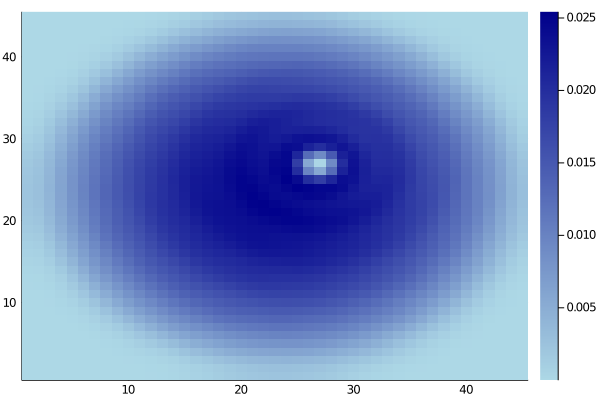

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)